<a href="https://colab.research.google.com/github/sinha-diksha/Natural_Disaster_Prediction/blob/main/drought_prediction_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
# Reading the input data

In [ ]:

import gdown

# url = 'https://drive.google.com/file/d/1y0kPSs9jn-M1GYUuhl06qRm1y9__ErDQ/view?usp=share_link' #drought.csv
# file_id = url.split('/')[-2]
# gdown_url = f'https://drive.google.com/uc?id={file_id}'
drought_df= pd.read_csv("drought.csv")
drought_df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2017-01-01,32.50,100.02,10.47,14.69,14.47,14.47,17.68,10.53,...,14.63,2.14,2.71,1.52,1.19,4.40,5.96,2.25,3.71,NaN
1,1001,2017-01-02,63.52,100.04,12.75,17.96,17.75,17.75,20.30,16.14,...,17.85,2.75,4.31,1.60,2.71,5.50,8.16,4.05,4.11,NaN
2,1001,2017-01-03,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,...,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0
3,1001,2017-01-04,0.01,100.02,5.21,8.10,3.86,3.88,11.74,2.12,...,8.08,2.63,3.95,1.34,2.60,4.98,6.16,3.36,2.80,NaN
4,1001,2017-01-05,0.01,99.89,4.54,5.91,2.20,2.22,13.07,-0.18,...,5.85,1.76,2.76,0.47,2.28,3.43,4.70,0.66,4.04,NaN


In [ ]:
drought_df.info() # Display information about the drought_df DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46188 entries, 0 to 46187
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fips         46188 non-null  int64  
 1   date         46188 non-null  object 
 2   PRECTOT      46188 non-null  float64
 3   PS           46188 non-null  float64
 4   QV2M         46188 non-null  float64
 5   T2M          46188 non-null  float64
 6   T2MDEW       46188 non-null  float64
 7   T2MWET       46188 non-null  float64
 8   T2M_MAX      46187 non-null  float64
 9   T2M_MIN      46187 non-null  float64
 10  T2M_RANGE    46187 non-null  float64
 11  TS           46187 non-null  float64
 12  WS10M        46187 non-null  float64
 13  WS10M_MAX    46187 non-null  float64
 14  WS10M_MIN    46187 non-null  float64
 15  WS10M_RANGE  46187 non-null  float64
 16  WS50M        46187 non-null  float64
 17  WS50M_MAX    46187 non-null  float64
 18  WS50M_MIN    46187 non-null  float64
 19  WS50

In [ ]:
drought_df.isnull().sum() # Check the count of missing values in each column of the drought_df DataFrame


fips               0
date               0
PRECTOT            0
PS                 0
QV2M               0
T2M                0
T2MDEW             0
T2MWET             0
T2M_MAX            1
T2M_MIN            1
T2M_RANGE          1
TS                 1
WS10M              1
WS10M_MAX          1
WS10M_MIN          1
WS10M_RANGE        1
WS50M              1
WS50M_MAX          1
WS50M_MIN          1
WS50M_RANGE        1
score          39608
dtype: int64

In [ ]:
drought_df = drought_df.dropna() # Remove rows with missing values from the drought_df DataFrame
drought_df.isnull().sum() # Check the count of missing values in each column after removing the missing values

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [ ]:
drought_df.dtypes


fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
dtype: object

In [ ]:
drought_df['year'] = pd.DatetimeIndex(drought_df['date']).year # Extracting year, month, and day from the 'date' column in drought_df DataFrame
drought_df['month'] = pd.DatetimeIndex(drought_df['date']).month
drought_df['day'] = pd.DatetimeIndex(drought_df['date']).day
# Dropping the 'date' column from the drought_df DataFrame
drought_df = drought_df.drop('date', 1)

In [ ]:
drought_df['score'] = drought_df['score'].round().astype(int) # Rounding the 'score' column to the nearest integer and converting it to integer data type
drought_df.dtypes # Checking the data types of columns in drought_df DataFrame

fips             int64
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score            int64
year             int64
month            int64
day              int64
dtype: object

In [ ]:
drought_df['fips'].nunique() # Counting the number of unique values in the 'fips' column of the drought_df DataFrame



64

In [ ]:
drought_df['score'].value_counts() # Counting the occurrences of each unique value in the 'score' column of the drought_df DataFrame


0    4393
1    1124
2     699
3     303
4      61
Name: score, dtype: int64

In [ ]:
# Descriptive statistics
display(drought_df.describe()) # For numeric columns
# display(drought_df.describe(include=['object'])) # For Categorical columns
print("\nSkewness: \n", drought_df.skew(axis = 0, skipna = True))
print("\nKurtosis: \n", drought_df.kurtosis(axis = 0, skipna = True))

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
count,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,...,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000,6580.000000
mean,1063.272340,3.959153,99.997792,11.074322,18.098737,13.979515,13.912169,24.158088,12.711527,11.446442,...,1.152766,1.692474,3.924002,5.635064,2.186947,3.448126,0.558511,2017.497872,6.440274,15.970669
std,36.532133,7.890391,1.008233,4.625059,8.047415,7.854681,7.826497,7.930772,8.558566,3.143710,...,0.679615,0.754222,1.352744,1.487378,1.443180,1.196732,0.920166,0.500033,3.446848,8.754330
min,1001.000000,0.000000,96.470000,1.250000,-8.570000,-14.470000,-13.190000,-2.390000,-14.540000,2.040000,...,0.010000,0.380000,0.720000,1.380000,0.010000,0.730000,0.000000,2017.000000,1.000000,1.000000
25%,1031.000000,0.000000,99.240000,7.150000,12.490000,8.847500,8.635000,19.090000,6.000000,9.520000,...,0.610000,1.160000,2.910000,4.580000,0.950000,2.580000,0.000000,2017.000000,3.000000,8.750000
50%,1063.000000,0.380000,100.120000,11.190000,19.670000,15.680000,15.640000,26.000000,13.945000,11.360000,...,1.130000,1.540000,3.770000,5.510000,1.970000,3.320000,0.000000,2017.000000,6.000000,16.000000
75%,1095.000000,4.182500,100.770000,15.380000,25.012500,20.692500,20.630000,30.530000,20.680000,13.510000,...,1.600000,2.060000,4.880000,6.620000,3.330000,4.150000,1.000000,2018.000000,9.000000,24.000000
max,1127.000000,87.040000,102.830000,19.800000,30.520000,25.060000,25.060000,39.000000,26.310000,21.220000,...,4.310000,6.840000,10.550000,13.320000,8.110000,11.130000,4.000000,2018.000000,12.000000,31.000000



Skewness: 
 fips           0.000518
PRECTOT        3.497167
PS            -0.259667
QV2M          -0.149250
T2M           -0.662456
T2MDEW        -0.887779
T2MWET        -0.848572
T2M_MAX       -0.706027
T2M_MIN       -0.544515
T2M_RANGE      0.056026
TS            -0.650709
WS10M          1.010705
WS10M_MAX      1.046223
WS10M_MIN      0.567745
WS10M_RANGE    1.353496
WS50M          0.452079
WS50M_MAX      0.451134
WS50M_MIN      0.486754
WS50M_RANGE    0.772165
score          1.623889
year           0.008513
month         -0.011905
day            0.009491
dtype: float64

Kurtosis: 
 fips           -1.199871
PRECTOT        17.719635
PS             -0.477891
QV2M           -1.118492
T2M            -0.395396
T2MDEW          0.229033
T2MWET          0.076336
T2M_MAX        -0.117921
T2M_MIN        -0.719208
T2M_RANGE      -0.005724
TS             -0.427671
WS10M           1.468124
WS10M_MAX       1.179201
WS10M_MIN       0.407133
WS10M_RANGE     3.069612
WS50M           0.046619
WS50M_M

In [ ]:
column_list = list(drought_df.columns) # Creating a list of column names from the drought_df DataFrame
column_list

['fips',
 'PRECTOT',
 'PS',
 'QV2M',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'T2M_RANGE',
 'TS',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE',
 'score',
 'year',
 'month',
 'day']

In [ ]:
# Creating a new DataFrame 'drought_df_measures' containing selected columns from 'drought_df'

measures_column_list = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']
drought_df_measures = drought_df[measures_column_list]

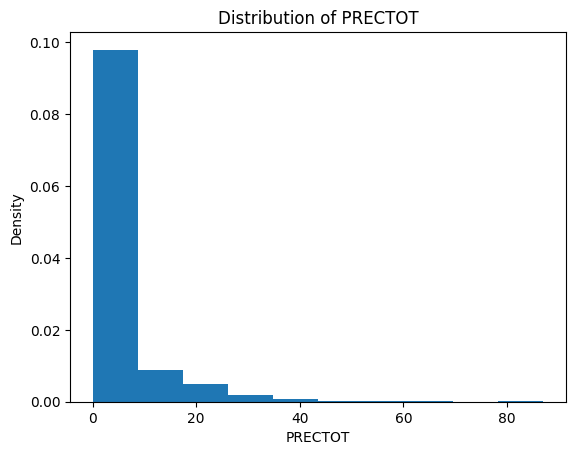

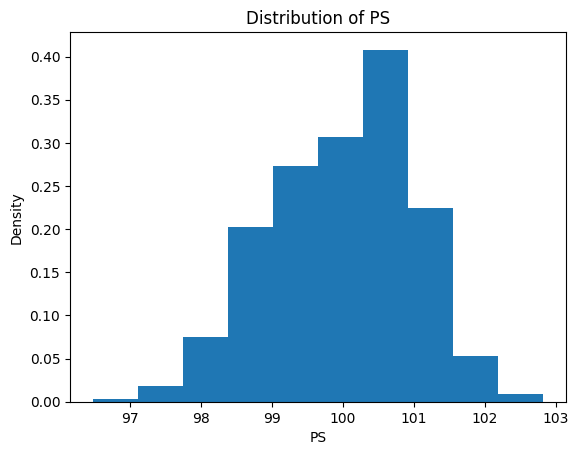

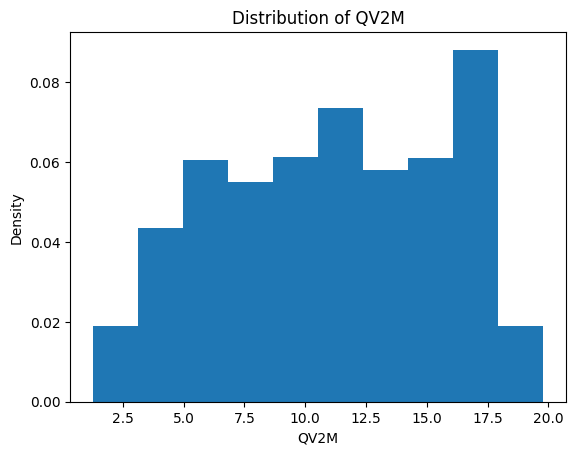

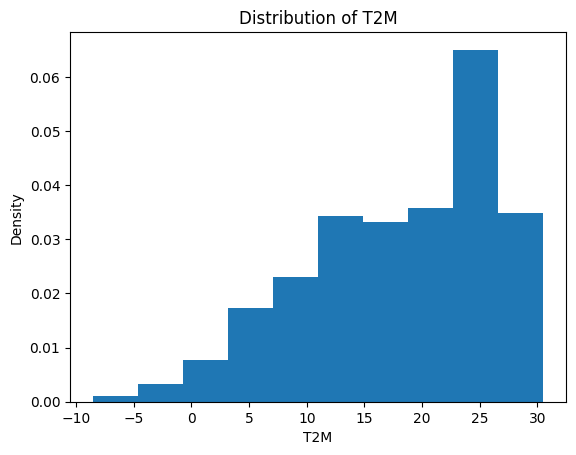

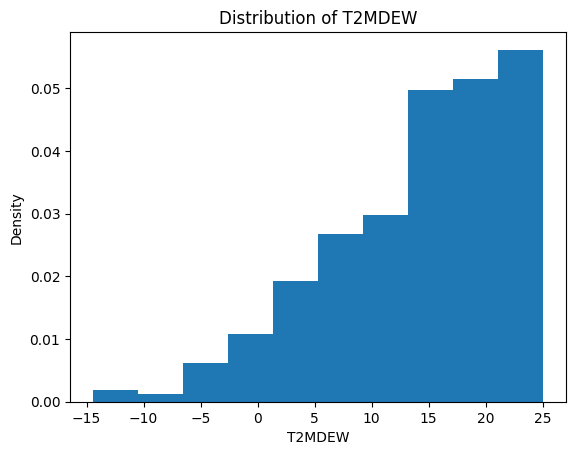

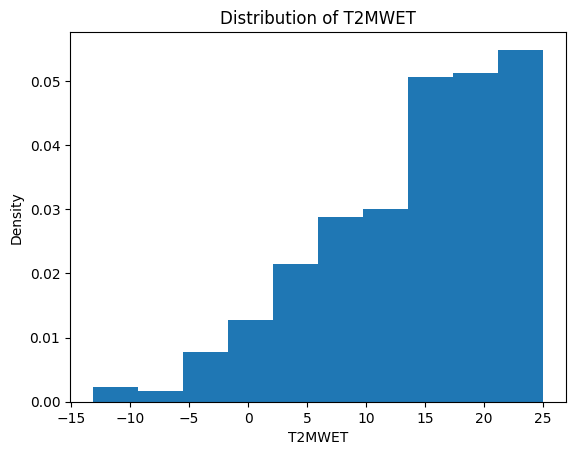

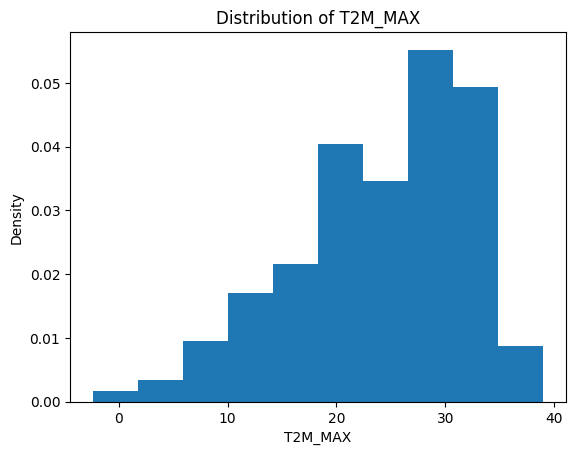

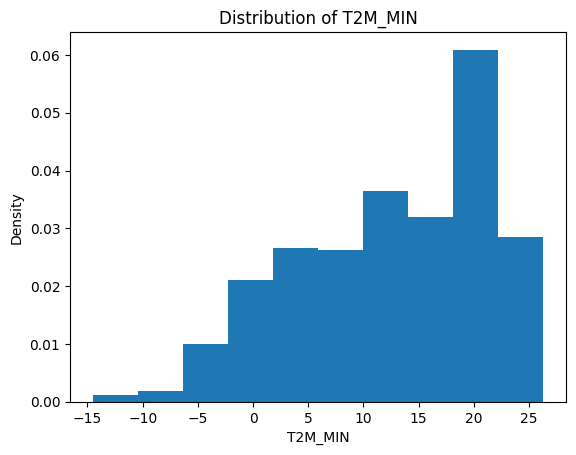

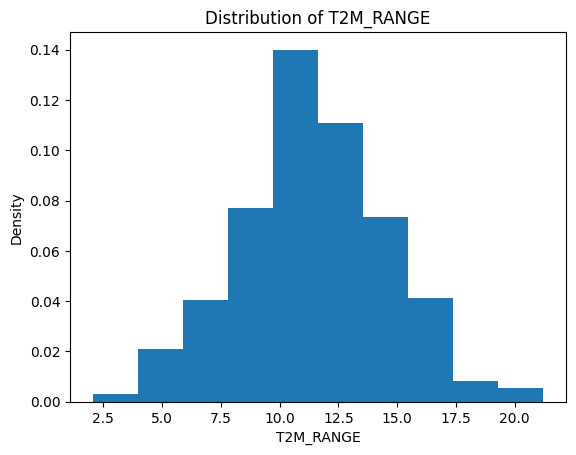

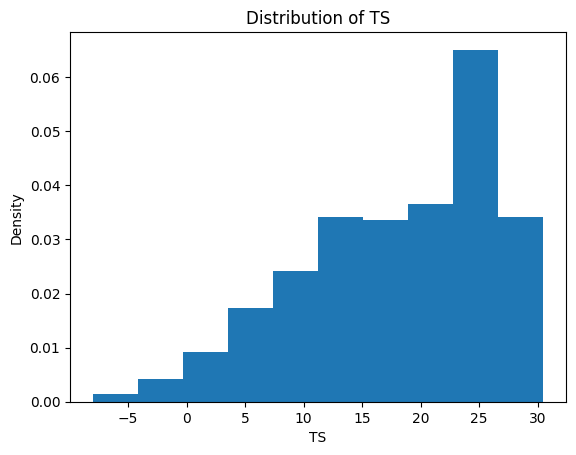

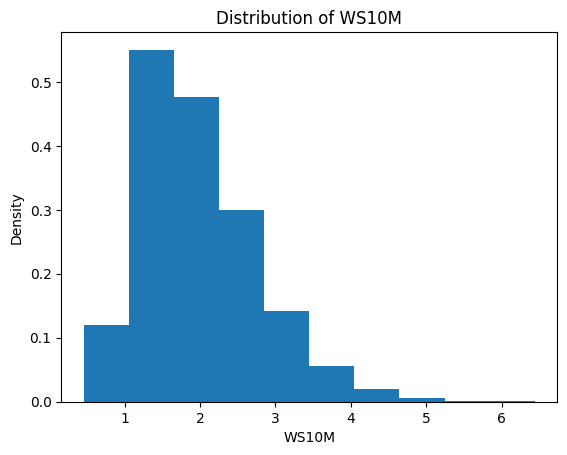

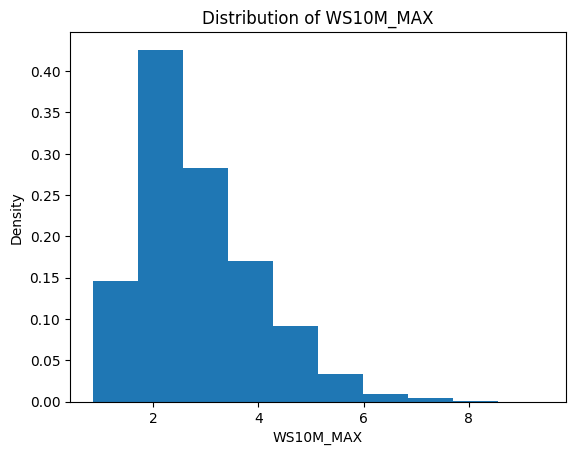

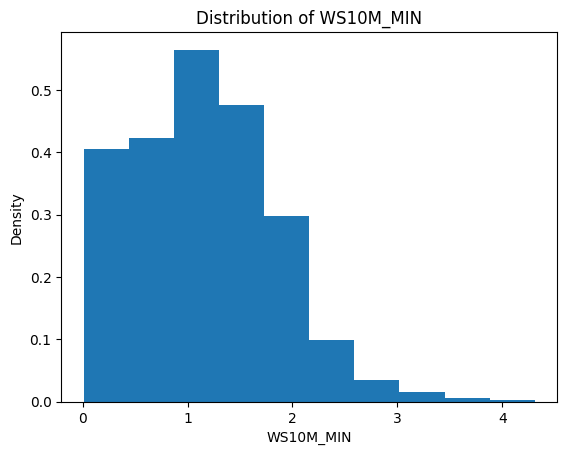

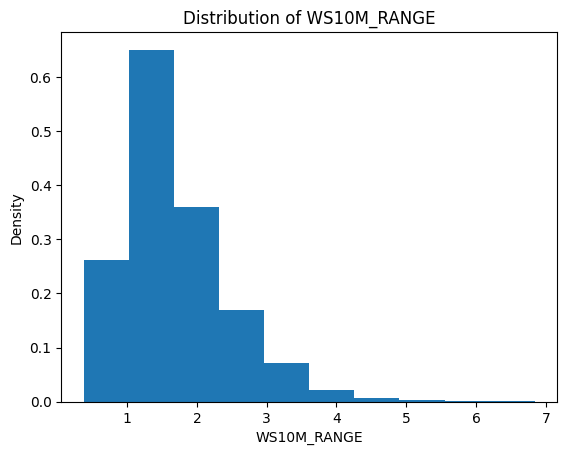

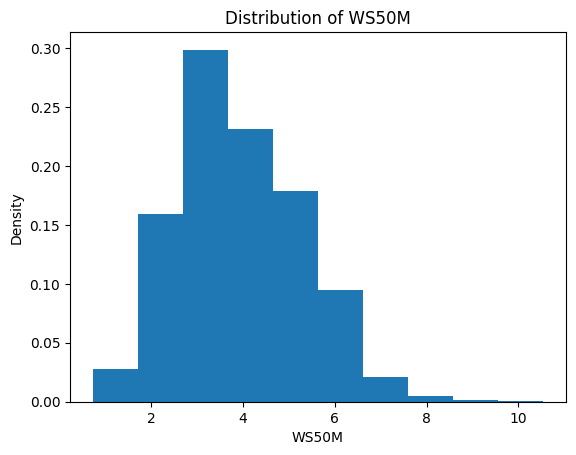

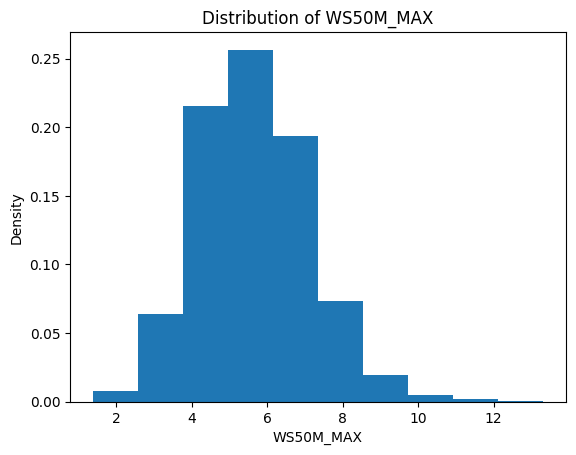

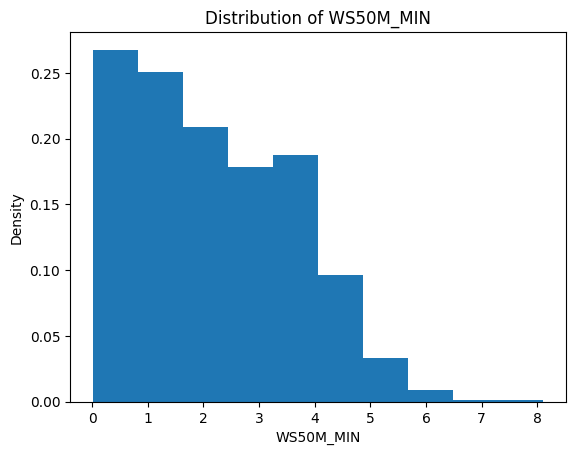

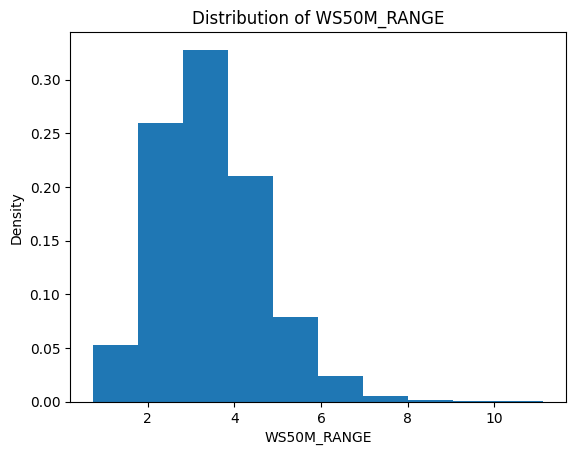

In [ ]:
for col_name in measures_column_list:
    plt.figure()
    plt.hist(drought_df_measures[col_name], density = True)
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

The above code snippet iterates over each column name in the measures_column_list and creates a histogram for that column using the plt.hist() function. The density=True argument is used to normalize the histogram. The x-axis label is set to the column name, and the y-axis label is set to "Density". The title of each histogram is set to "Distribution of [column name]". Each histogram is plotted in a separate figure.

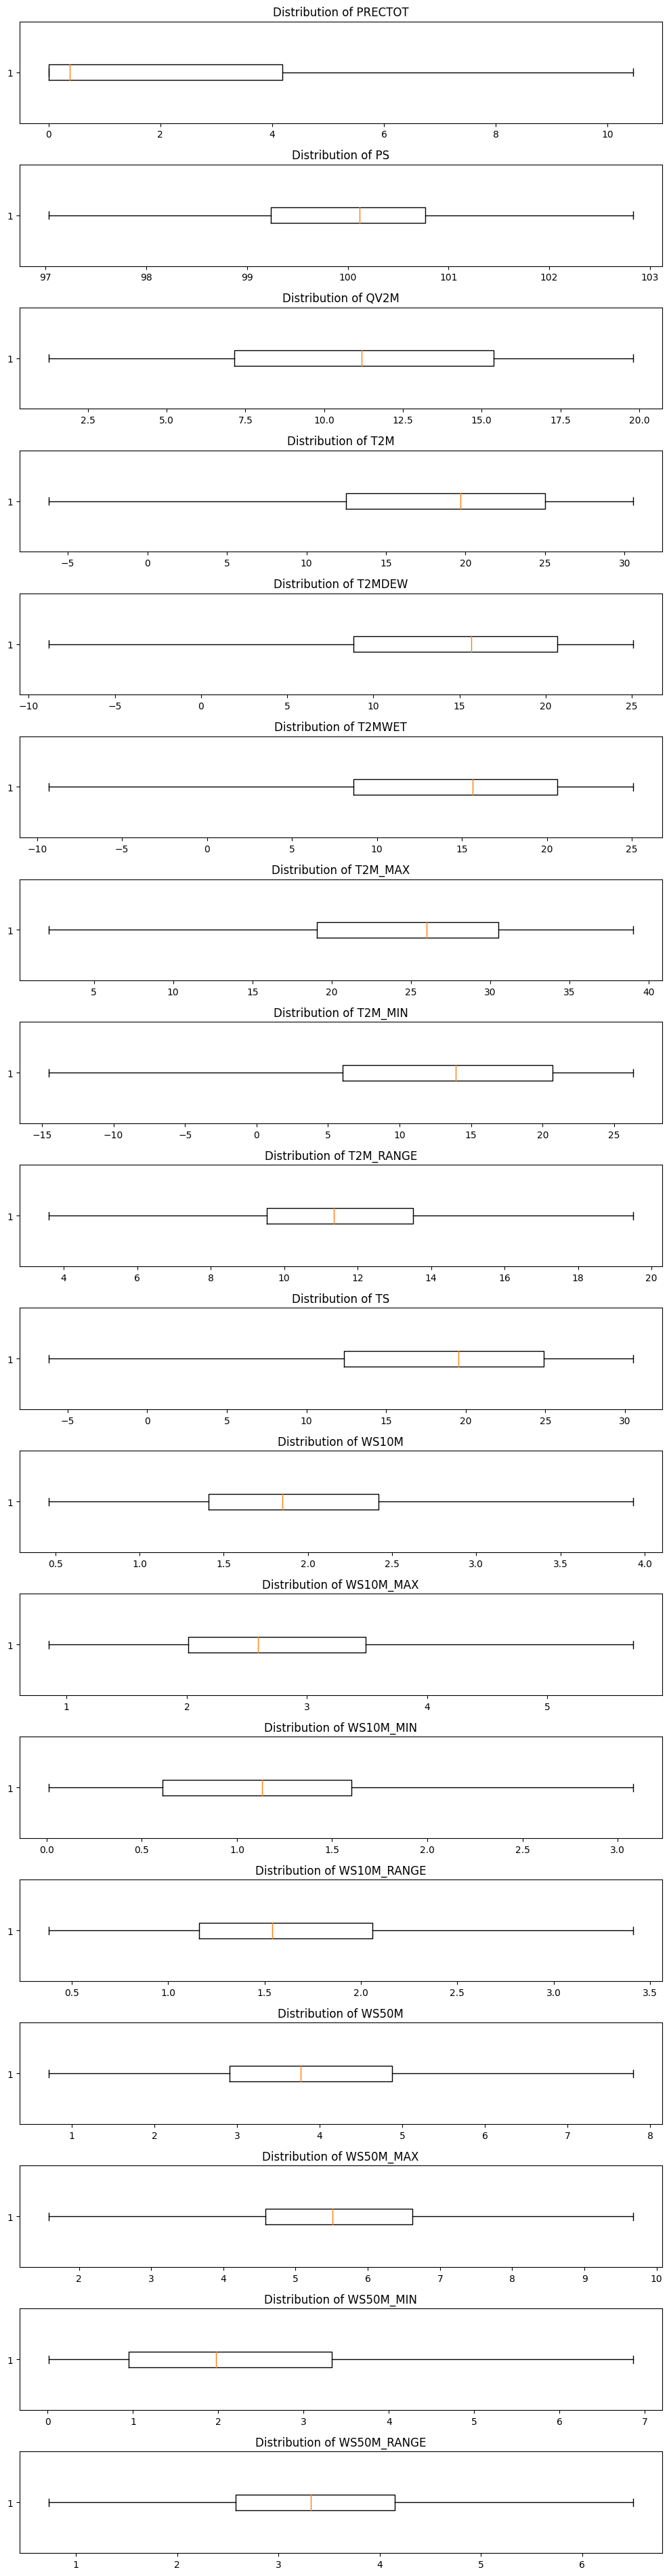

In [ ]:
plt.figure(figsize=(10,40))
for x in (range(1,19)):
    plt.subplot(19,1,x)
    plt.boxplot(x= drought_df_measures.iloc[:, x-1], vert=False, showfliers=False)
    x_name = drought_df_measures.columns[x-1]
    plt.title(f'Distribution of {x_name}')
plt.tight_layout()

The code above creates a figure with multiple subplots arranged in a vertical layout. For each subplot, a boxplot is created using the data from the corresponding column in drought_df_measures. The vert=False parameter ensures that the boxplots are horizontally oriented. The showfliers=False parameter is used to exclude any outliers from the boxplots. The title of each subplot is set to "Distribution of [column name]". The tight_layout() function is called to improve the spacing between the subplots.

In [ ]:
for col_name in measures_column_list: # Iterate over each column in the measures_column_list
    q1 = drought_df[col_name].quantile(0.25) # Calculate the first quartile (Q1) using the quantile function with 0.25 as the argument
    q3 = drought_df[col_name].quantile(0.75) # Calculate the third quartile (Q3) using the quantile function with 0.75 as the argument
    iqr = q3-q1 # Calculate the interquartile range (IQR) by subtracting Q1 from Q3
    k = 1.5 # Set the value of k as 1.5 (a commonly used value for identifying outliers)
    cutoff = iqr * k # Calculate the cutoff value by multiplying the IQR by k
    # Filter the dataframe to include only rows where the values are within the range of Q1 - cutoff to Q3 + cutoff
    drought_df = drought_df[(drought_df[col_name] >= q1 - cutoff) & (drought_df[col_name] <= q3 + cutoff)]

print('Total rows = ',len(drought_df.index)) # Print the total number of rows in the filtered dataframe

Total rows =  5219


In [ ]:
categorical_column_list = ['score','year','month','day'] # Create a list of categorical column names
drought_df_categorical = drought_df[['score','year','month','day']] # Create a new dataframe containing only the selected categorical columns

<Figure size 1000x4000 with 0 Axes>

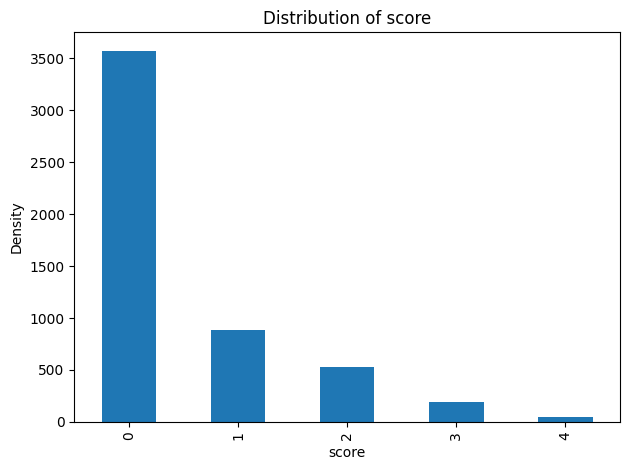

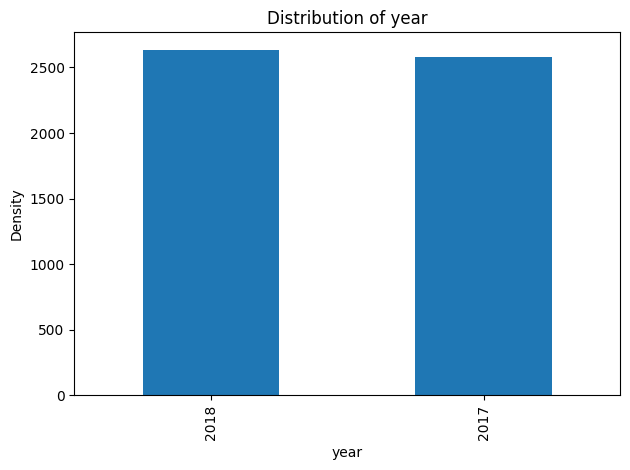

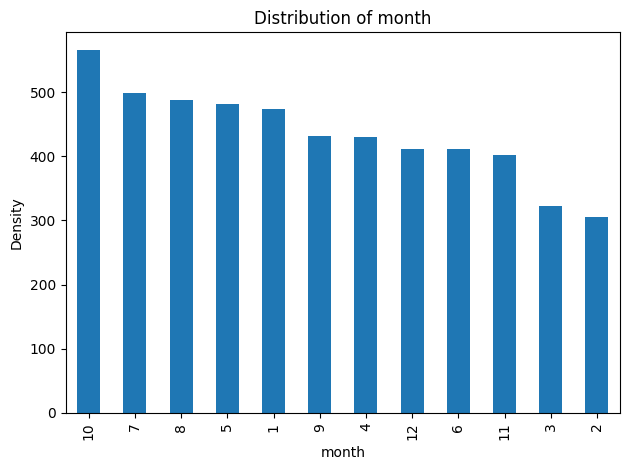

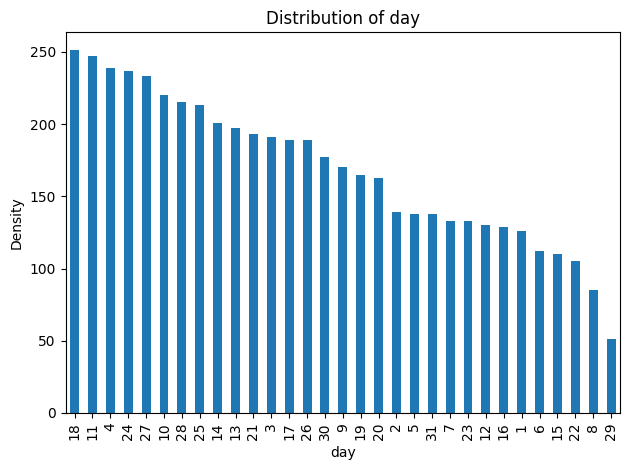

In [ ]:
plt.figure(figsize=(10,40)) # Set the figure size for the subplots
# Iterate over each categorical column
for col_name in categorical_column_list:
     # Create a new figure for each column
    plt.figure()
    # Plot the value counts of the column as a bar plot
    drought_df_categorical[col_name].value_counts().plot(kind = 'bar')
    # Set the x-axis label as the column name
    x_name = col_name
    # Set the y-axis label as 'Density'
    y_name = 'Density'
    plt.xlabel(x_name) # Set the x-axis label
    plt.ylabel(y_name) # Set the y-axis label
    plt.title('Distribution of {x_name}'.format(x_name=x_name)) # Set the title of the plot
    plt.tight_layout() # Adjust the spacing between subplots

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, 'PRECTOT'),
  Text(1.5, 0, 'PS'),
  Text(2.5, 0, 'QV2M'),
  Text(3.5, 0, 'T2M'),
  Text(4.5, 0, 'T2MDEW'),
  Text(5.5, 0, 'T2MWET'),
  Text(6.5, 0, 'T2M_MAX'),
  Text(7.5, 0, 'T2M_MIN'),
  Text(8.5, 0, 'T2M_RANGE'),
  Text(9.5, 0, 'TS'),
  Text(10.5, 0, 'WS10M'),
  Text(11.5, 0, 'WS10M_MAX'),
  Text(12.5, 0, 'WS10M_MIN'),
  Text(13.5, 0, 'WS10M_RANGE'),
  Text(14.5, 0, 'WS50M'),
  Text(15.5, 0, 'WS50M_MAX'),
  Text(16.5, 0, 'WS50M_MIN'),
  Text(17.5, 0, 'WS50M_RANGE')])

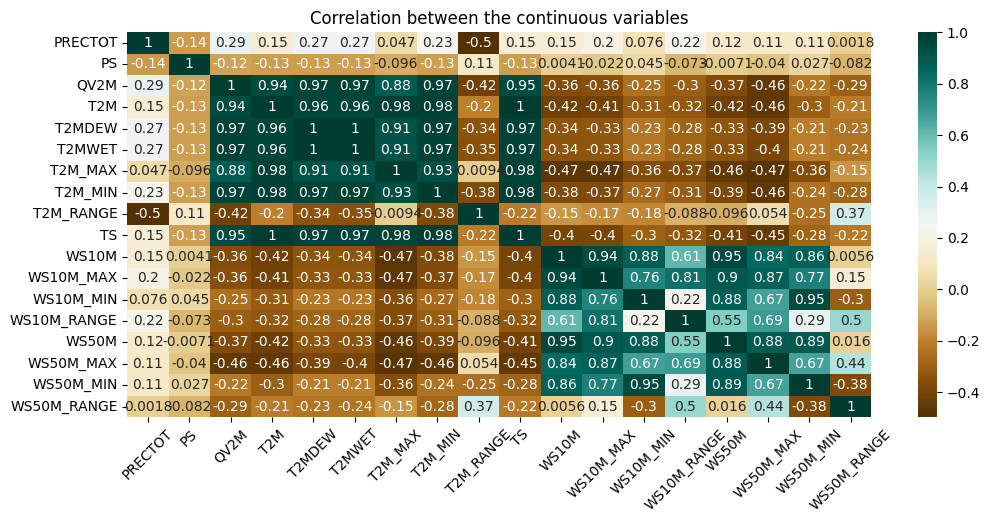

In [ ]:
plt.subplots(figsize=(12,5)) # Create a figure and axes for the heatmap
sns.heatmap(drought_df_measures.corr(),annot=True,cmap='BrBG') # Generate the correlation matrix and plot it as a heatmap
plt.title('Correlation between the continuous variables') # Set the title of the plot
plt.xticks(rotation=45) # Rotate the x-axis tick labels by 45 degrees for better visibility

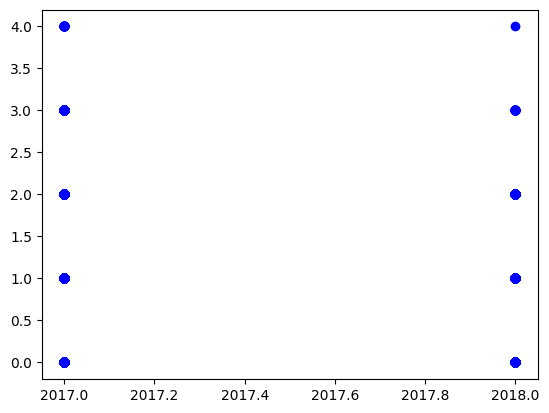

In [ ]:
plt.scatter(drought_df['year'], drought_df['score'], c ="blue") # Create a scatter plot of 'year' vs 'score
plt.show()

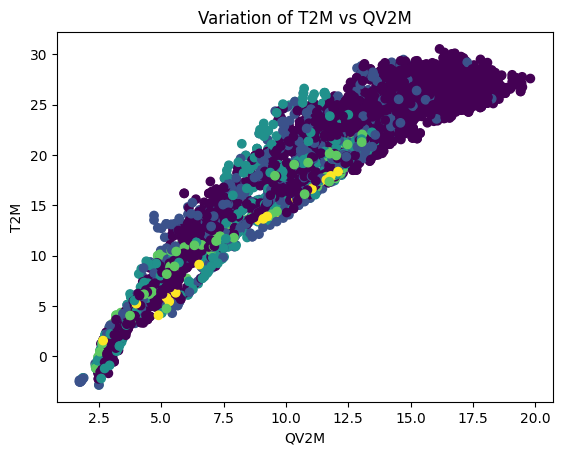

In [ ]:
plt.scatter(drought_df['QV2M'], drought_df['T2M'], c =drought_df['score']) # Create a scatter plot of 'QV2M' vs 'T2M' with color-coded by 'score'
plt.xlabel('QV2M') # Set the x-axis label
plt.ylabel('T2M') # Set the y-axis label
plt.title('Variation of T2M vs QV2M') # Set the title of the plot
plt.show() # Show the plot

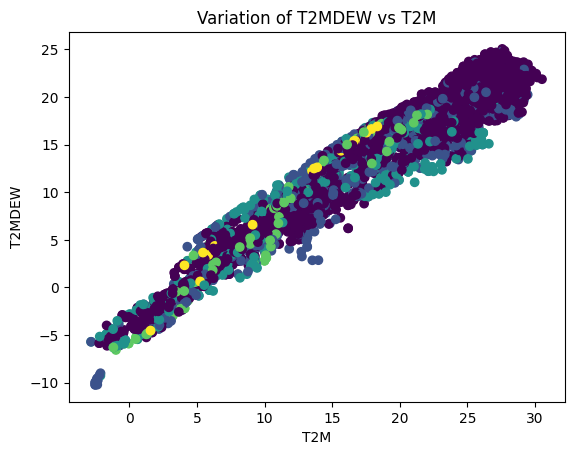

In [ ]:
plt.scatter(drought_df['T2M'], drought_df['T2MDEW'], c =drought_df['score']) # Create a scatter plot of 'T2M' vs 'T2MDEW' with color-coded by 'score'
plt.xlabel('T2M')
plt.ylabel('T2MDEW')
plt.title('Variation of T2MDEW vs T2M') # Set the title of the plot
plt.show()

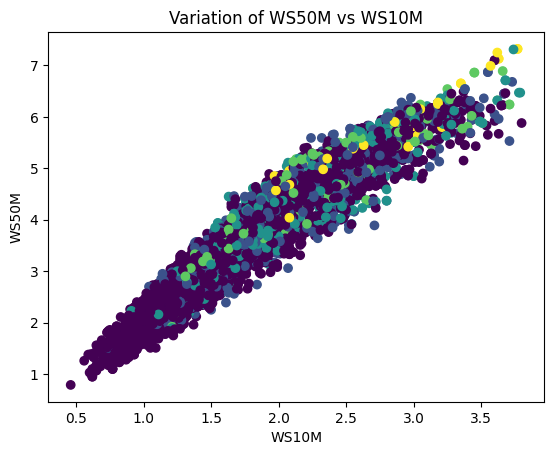

In [ ]:
temp_df = drought_df[drought_df['score']==5]
plt.scatter(drought_df['WS10M'], drought_df['WS50M'], c= drought_df['score'])
plt.xlabel('WS10M')
plt.ylabel('WS50M')
plt.title('Variation of WS50M vs WS10M')
plt.show()

In [ ]:
independent_variables = drought_df.drop('score', 1) # Create a new DataFrame 'independent_variables' by dropping the 'score' column from 'drought_df'
independent_variables = independent_variables.drop('fips', 1) # Drop the 'fips' column from the 'independent_variables' DataFrame
independent_variables.head() # Display the head of the 'independent_variables' DataFrame

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,year,month,day
9,0.02,101.13,5.62,5.92,4.54,4.55,12.42,-2.37,14.79,5.81,...,4.24,2.52,1.72,6.19,7.55,4.68,2.86,2017,1,10
16,0.14,100.60,11.41,17.21,16.06,16.06,23.03,13.15,9.88,17.10,...,3.61,1.71,1.90,4.93,5.90,2.76,3.15,2017,1,17
23,0.00,99.72,5.60,9.27,5.34,5.35,16.23,4.18,12.06,8.95,...,2.34,1.03,1.31,3.52,6.49,1.47,5.02,2017,1,24
30,0.00,100.37,7.31,11.38,9.21,9.21,20.29,5.05,15.24,11.32,...,3.00,1.76,1.24,5.00,7.40,2.88,4.52,2017,1,31
58,0.42,100.56,11.73,18.25,16.49,16.49,24.01,13.92,10.09,18.21,...,4.52,1.90,2.62,5.75,7.35,3.91,3.45,2017,2,28


In [ ]:
target = drought_df['score'] # Assign the 'score' column from 'drought_df' as the target variable
target.head() # Display the head of the 'target' variable

9     2
16    2
23    1
30    1
58    1
Name: score, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)


,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,year,month,day
16834,0.30,100.38,7.47,12.78,9.20,9.20,20.50,4.69,15.81,12.80,...,2.92,0.14,2.78,3.69,6.41,0.17,6.24,2017,2,14
43373,0.00,101.09,7.48,15.06,9.70,9.71,24.28,7.12,17.16,15.09,...,2.18,0.34,1.84,3.33,5.55,0.54,5.01,2017,10,31
1525,3.46,101.15,10.20,16.52,14.34,14.34,22.28,10.47,11.81,16.53,...,4.34,2.09,2.25,5.57,6.77,4.13,2.64,2017,3,7
36094,0.00,100.77,5.47,10.52,5.00,5.01,20.07,3.26,16.80,9.98,...,2.09,0.45,1.63,3.00,5.62,0.78,4.84,2017,11,21
45759,3.49,100.08,14.64,26.01,20.09,19.93,32.25,18.67,13.58,25.50,...,1.61,0.48,1.13,2.21,4.39,0.72,3.68,2018,5,15


In [ ]:
print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)


Train features shape (4175, 21)
Train target shape (4175,)
Test features shape (1044, 21)
Test target shape (1044,)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.49362521,  0.35576992, -0.80707982, ..., -1.00167805,
        -1.39484048, -0.26286843],
       [-0.61893187,  1.08519188, -0.80486633, ..., -1.00167805,
         0.98232413,  1.67492619],
       [ 0.82627163,  1.14683318, -0.20279744, ..., -1.00167805,
        -1.09769491, -1.06078386],
       ...,
       [ 1.52381204,  0.35576992,  1.3599255 , ...,  0.99832476,
         0.68517856,  0.19308325],
       [ 0.21644587,  2.38993258, -1.88947574, ...,  0.99832476,
        -1.69198606, -0.03489259],
       [ 2.01250802,  1.37285125, -1.19665381, ...,  0.99832476,
         1.27946971, -0.37685635]])

In [ ]:
pca = PCA(.90)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
print("Number of components after PCA: ", pca.n_components_)

Number of components after PCA:  7


#using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier() # Create an instance of KNeighborsClassifier

k_range = list(range(1, 10)) # Define the range of values for the parameter to be tuned
param_grid = dict(n_neighbors=k_range) # Define the parameter grid for GridSearchCV

grid = GridSearchCV(knn, param_grid, scoring='accuracy', return_train_score=False, verbose=1) # Create an instance of GridSearchCV
grid_search = grid.fit(X_train, y_train) # Perform grid search to find the best parameter

print("Most Accurate n is:", grid_search.best_params_["n_neighbors"]) # Print the most accurate value of n_neighbors

knn.set_params(n_neighbors=grid_search.best_params_["n_neighbors"]) # Set the best value of n_neighbors for the KNN classifier
knn.fit(X_train, y_train) # Fit the KNN classifier on the training data
y_pred_knn = knn.predict(X_test) # Predict the labels for the test data


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Most Accurate n is: 1


In [ ]:
print('KNN:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))

KNN:

[[663  49   7   0   0]
 [ 48  87  34   0   0]
 [ 12  37  50  11   1]
 [  1   0   8  22   3]
 [  0   0   1   2   8]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       719
           1       0.50      0.51      0.51       169
           2       0.50      0.45      0.47       111
           3       0.63      0.65      0.64        34
           4       0.67      0.73      0.70        11

    accuracy                           0.80      1044
   macro avg       0.64      0.65      0.65      1044
weighted avg       0.79      0.80      0.79      1044

Accuracy: 0.7950191570881227
Precision: 0.7927341685147055
